# AI/ML - Research - Computer Vision

### biblioteki


In [18]:
import kaggle
import os
import splitfolders 
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torchvision     
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim
import torch.nn.functional as F






### podział danych

In [2]:
SEED = "HackYeah"
data_path = './data'
data_tmp = './data_tmp'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if os.path.exists(data_path):
    print("Dane sa juz pobrane")
else:
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('gergvincze/simple-hand-drawn-and-digitized-images', path=data_tmp, unzip=True)
    splitfolders.ratio(input=data_tmp, move=True, output=data_path, seed=SEED, ratio=(0.7, 0.15, 0.15))
    shutil.rmtree(data_tmp)

Dane sa juz pobrane


In [3]:
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0),(1))
])

train_ds = torchvision.datasets.ImageFolder(
    os.path.join(data_path, 'train'), transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, shuffle=True
)

val_ds = torchvision.datasets.ImageFolder(
    os.path.join(data_path, 'val'), transform=transform
)
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=batch_size, shuffle=True
)

test_ds = torchvision.datasets.ImageFolder(
    os.path.join(data_path, 'test'), transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=batch_size, shuffle=True
)

In [5]:
train_ds.classes


['anchor',
 'balloon',
 'bicycle',
 'envelope',
 'paper_boat',
 'peace_symbol',
 'smiley',
 'speech_bubble',
 'spiral',
 'thumb']

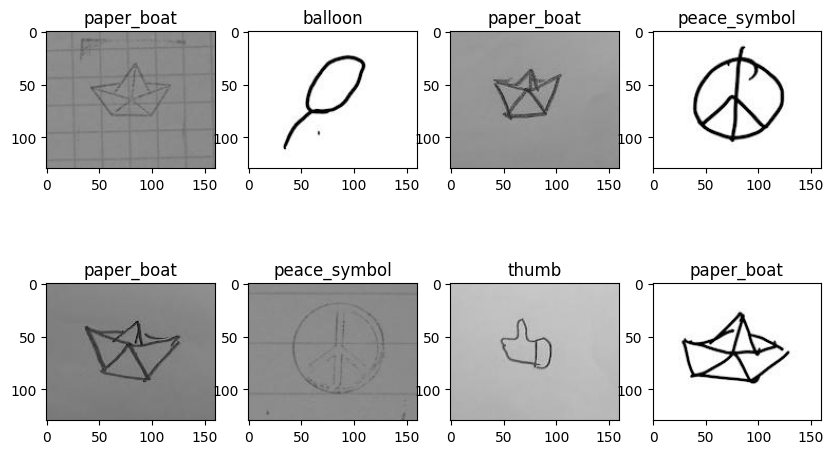

In [6]:
images, labels = next(iter(train_loader))
images = images[:8]
labels = labels[:8]

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
axes = axes.flatten()

for ax, img, lab in zip(axes, images, labels):
    ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    ax.set_title(f"{train_ds.classes[lab.item()]}")
plt.show()

Problem moze tutaj byc z uwagi na to ze obrazki nie sa na jednolitym tle przez co CNN moze wykryc poszczegolne miejsca jako krawedzie, niektore obrazki są niewyraźne co również raczej wpłynie na finaly efekt uczenia 


In [7]:
def check_image_shapes(dataset):
    shapes = [img.shape for img, _ in dataset]
    common = max(set(shapes), key=shapes.count)
    diff = [i for i, s in enumerate(shapes) if s != common]
    print(f"Najczęstszy wymiar: {common}")
    print(f"Liczba różnych: {len(diff)}")
    return diff

diff_idx = check_image_shapes(train_ds)



Najczęstszy wymiar: torch.Size([3, 130, 160])
Liczba różnych: 0


wszystkie obrazki sa deafultowo tego samego rozmiaru 

In [8]:
pd.Series([label for _, label in train_ds]).map(lambda x: train_ds.classes[x]).value_counts()


anchor           30
balloon          30
bicycle          30
envelope         30
peace_symbol     30
smiley           30
spiral           30
thumb            30
paper_boat       29
speech_bubble    28
Name: count, dtype: int64

In [9]:
pd.Series([label for _, label in val_ds]).map(lambda x: val_ds.classes[x]).value_counts()


anchor           6
balloon          6
bicycle          6
envelope         6
paper_boat       6
peace_symbol     6
smiley           6
speech_bubble    6
spiral           6
thumb            6
Name: count, dtype: int64

In [10]:
pd.Series([label for _, label in test_ds]).map(lambda x: test_ds.classes[x]).value_counts()


anchor           8
bicycle          8
envelope         8
thumb            8
balloon          7
paper_boat       7
peace_symbol     7
smiley           7
speech_bubble    7
spiral           7
Name: count, dtype: int64

Trochę malutko danych 

powiekszenie roznorodnosci danych, aby sprobować znieść wpływ niejednorodnego tła 

In [11]:
train_transform = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])
train_ds = torchvision.datasets.ImageFolder(
    os.path.join(data_path, 'train'), transform=train_transform
)

train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, shuffle=True
)

In [ ]:
class MyCNN(nn.Module):
    def __init__(self, num_classes):
        super(MyCNN, self).__init__()
        

    def forward(self, x):
        
        return x
    

In [15]:
num_classes = len(train_ds.classes)
model = MyCNN(num_classes)
criterion = nn.CrossEntropyLoss()
otimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(otimizer, step_size=7, gamma=0.1)
